In [ ]:
# Import TypedDict and Literal for type hints
from typing import TypedDict, Literal

# Define the state structure for conditional routing based on target currency
class PortfolioState(TypedDict): #graph
    amount_usd: float                      # Initial USD amount
    total_usd: float                       # Total in USD after conversion
    target_currency: Literal["INR", "EUR"]  # Currency choice for conversion
    total: float                           # Final converted amount

In [ ]:
# Define node functions for portfolio conversion

# Node 1: Calculate total USD with interest (8% conversion rate)
def calc_total(state: PortfolioState) -> PortfolioState:
    """Multiply USD amount by 1.08 to simulate interest/conversion"""
    state['total_usd'] = state['amount_usd'] * 1.08  #we use state instead of variable names for readibilty
    return state

# Node 2: Convert USD to INR (Indian Rupees, 1 USD = 85 INR)
def convert_to_inr(state: PortfolioState) -> PortfolioState:
    """Convert total USD to Indian Rupees"""
    state['total'] = state['total_usd'] * 85
    return state

# Node 3: Convert USD to EUR (Euro, 1 USD = 0.9 EUR)
def convert_to_eur(state: PortfolioState) -> PortfolioState:
    """Convert total USD to Euros"""
    state['total'] = state['total_usd'] * 0.9
    return state

# Conditional routing function that determines which conversion path to take
def choose_conversion(state: PortfolioState) -> str:
    """Return the target currency to determine routing"""
    return state["target_currency"]

In [ ]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.5 which is incompatible.


In [ ]:
# Build the state graph with conditional routing
from langgraph.graph import StateGraph, START, END

# Create a state graph with PortfolioState as the state schema
builder = StateGraph(PortfolioState)

# Add nodes to the graph
builder.add_node("calc_total_node", calc_total)              # Node for USD calculation
builder.add_node("convert_to_inr_node", convert_to_inr)      # Node for INR conversion
builder.add_node("convert_to_eur_node", convert_to_eur)      # Node for EUR conversion

# Define edges
builder.add_edge(START, "calc_total_node")

# Add conditional edges: after calc_total_node, route based on target_currency
builder.add_conditional_edges(
    "calc_total_node",
    choose_conversion,
    {
        "INR": "convert_to_inr_node",  # If INR, go to INR conversion
        "EUR": "convert_to_eur_node",  # If EUR, go to EUR conversion
    }
)

# Both conversion nodes lead to END
builder.add_edge(["convert_to_inr_node", "convert_to_eur_node"], END)

# Compile the graph
graph = builder.compile()

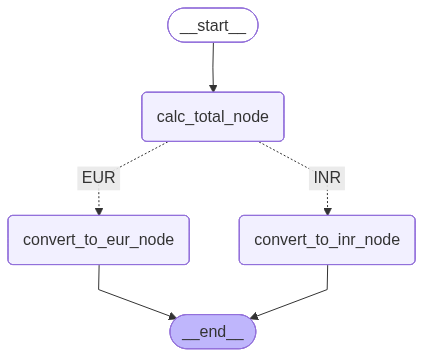

In [ ]:
# Visualize the conditional graph structure
from IPython.display import Image, display

# Draw and display the graph with conditional routing as a Mermaid diagram
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# Execute the graph with EUR conversion target
# Input: 1,000 USD with target_currency = "EUR"
# Expected: 1,000 * 1.08 = 1,080 USD, then 1,080 * 0.9 = 972 EUR
graph.invoke({"amount_usd": 1000, "target_currency": "INR"})
graph.invoke({"amount_usd": 100, "target_currency": "INR"})

{'amount_usd': 100,
 'total_usd': 108.0,
 'target_currency': 'INR',
 'total': 9180.0}